In [1]:
import stanza
import pandas as pd

stanza.download('en')
nlp = stanza.Pipeline('en')

2021-08-10 09:52:02 INFO: Downloading default packages for language: en (English)...
2021-08-10 09:52:03 INFO: File exists: C:\Users\sanch\stanza_resources\en\default.zip.
2021-08-10 09:52:06 INFO: Finished downloading models and saved to C:\Users\sanch\stanza_resources.
2021-08-10 09:52:06 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-08-10 09:52:06 INFO: Use device: cpu
2021-08-10 09:52:06 INFO: Loading: tokenize
2021-08-10 09:52:06 INFO: Loading: pos
2021-08-10 09:52:07 INFO: Loading: lemma
2021-08-10 09:52:07 INFO: Loading: depparse
2021-08-10 09:52:07 INFO: Loading: sentiment
2021-08-10 09:52:07 INFO: Loading: ner
2021-08-10 09:52:08 INFO: Done loading processors!


In [3]:
moby_dick_para1 = "Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time to get to sea as soon as I can. This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship. There is nothing surprising in this. If they but knew it, almost all men in their degree, some time or other, cherish very nearly the same feelings towards the ocean with me."

moby_p1 = nlp(moby_dick_para1) # return a Document object

In [3]:
moby_p1.sentences[0]

[
  {
    "id": 1,
    "text": "Call",
    "lemma": "call",
    "upos": "VERB",
    "xpos": "VB",
    "feats": "Mood=Imp|VerbForm=Fin",
    "head": 0,
    "deprel": "root",
    "misc": "start_char=0|end_char=4",
    "ner": "O"
  },
  {
    "id": 2,
    "text": "me",
    "lemma": "I",
    "upos": "PRON",
    "xpos": "PRP",
    "feats": "Case=Acc|Number=Sing|Person=1|PronType=Prs",
    "head": 1,
    "deprel": "obj",
    "misc": "start_char=5|end_char=7",
    "ner": "O"
  },
  {
    "id": 3,
    "text": "Ishmael",
    "lemma": "Ishmael",
    "upos": "PROPN",
    "xpos": "NNP",
    "feats": "Number=Sing",
    "head": 1,
    "deprel": "vocative",
    "misc": "start_char=8|end_char=15",
    "ner": "S-PERSON"
  },
  {
    "id": 4,
    "text": ".",
    "lemma": ".",
    "upos": "PUNCT",
    "xpos": ".",
    "head": 1,
    "deprel": "punct",
    "misc": "start_char=15|end_char=16",
    "ner": "O"
  }
]

In [4]:
def print_sentence_info(sentence):
    print(f"Text: {sentence.text}")
    print(f"Num tokens:\t{len(sentence.tokens)}")
    print(f"Num words:\t{len(sentence.words)}")
    print(f"Num entities:\t{len(sentence.entities)}")

print_sentence_info(moby_p1.sentences[0])

Text: Call me Ishmael.
Num tokens:	4
Num words:	4
Num entities:	1


In [5]:
def print_token_info(token):
    print(f"Text:\t{token.text}")
    print(f"Start:\t{token.start_char}")
    print(f"End:\t{token.end_char}")

print_token_info(moby_p1.sentences[0].tokens[2])


Text:	Ishmael
Start:	8
End:	15


In [6]:
def print_word_info(word):
    print(f"Text:\t{word.text}")
    print(f"Lemma: \t{word.lemma}")
    print(f"UPOS: \t{word.upos}")
    print(f"XPOS: \t{word.xpos}")

print_word_info(moby_p1.sentences[3].words[4])

Text:	growing
Lemma: 	grow
UPOS: 	VERB
XPOS: 	VBG


In [7]:
def word_info_df(doc):
    """
    - Parameters: doc (a Stanza Document object)
    - Returns: A Pandas DataFrame object with one row for each token in
      doc, and columns for text, lemma, upos, and xpos.
    """
    rows = []
    for sentence in doc.sentences:
        for word in sentence.words:
            row = {
                "text": word.text,
                "lemma": word.lemma,
                "upos": word.upos,
                "xpos": word.xpos,
            }
            rows.append(row)
    return pd.DataFrame(rows)

word_info_df(moby_p1)

,text,lemma,upos,xpos
0,Call,call,VERB,VB
1,me,I,PRON,PRP
2,Ishmael,Ishmael,PROPN,NNP
3,.,.,PUNCT,.
4,Some,some,DET,DT
...,...,...,...,...
222,the,the,DET,DT
223,ocean,ocean,NOUN,NN
224,with,with,ADP,IN
225,me,I,PRON,PRP


In [8]:
def print_entity_info(entity):
    print(f"Text:\t{entity.text}")
    print(f"Type:\t{entity.type}")
    print(f"Start:\t{entity.start_char}")
    print(f"End:\t{entity.end_char}")

print_entity_info(moby_p1.entities[0])

Text:	Ishmael
Type:	PERSON
Start:	8
End:	15


In [4]:
def sentiment_descriptor(sentence):
    """
    - Parameters: sentence (a Stanza Sentence object)
    - Returns: A string descriptor for the sentiment value of sentence.
    """
    sentiment_value = sentence.sentiment
    if (sentiment_value == 0):
        return "negative"
    elif (sentiment_value == 1):
        return "neutral"
    else:
        return "positive"

print(sentiment_descriptor(moby_p1.sentences[0]))


neutral


In [10]:
moby_p1.sentences[0].sentiment

1

In [5]:
def sentence_sentiment_df(doc):
    """
    - Parameters: doc (a Stanza Document object)
    - Returns: A Pandas DataFrame with one row for each sentence in doc,
      and columns for the sentence text and sentiment descriptor.
    """
    rows = []
    for sentence in doc.sentences:
        row = {
            "text": sentence.text,
            "sentiment": sentiment_descriptor(sentence)
        }
        rows.append(row)
    return pd.DataFrame(rows)

sentence_sentiment_df(moby_p1)

,text,sentiment
0,Call me Ishmael.,neutral
1,Some years ago—never mind how long precisely—h...,negative
2,It is a way I have of driving off the spleen a...,negative
3,Whenever I find myself growing grim about the ...,negative
4,This is my substitute for pistol and ball.,neutral
5,With a philosophical flourish Cato throws hims...,neutral
6,There is nothing surprising in this.,negative
7,"If they but knew it, almost all men in their d...",neutral


In [11]:
tweet_para1 ="The vaccine is secure, I am not afraid, this can save  my life"

tw_p1 = nlp(tweet_para1) # return a Document object

In [12]:
sentence_sentiment_df(tw_p1)

,text,sentiment
0,"The vaccine is secure, I am not afraid, this c...",negative


In [9]:
tweet_para2 ="A single dose of the Covid-19 vaccine made by Johnson &amp; Johnson is highly effective in preventing severe illness and death."

tw_p2 = nlp(tweet_para2) # return a Document object
sentence_sentiment_df(tw_p2)

,text,sentiment
0,A single dose of the Covid-19 vaccine made by ...,positive


In [10]:
tweet_para2 = "I interviewed Charlotte today, the widow of Dr Stephen Wrigth who lost his life after having the AZ vaccine"

tw_p2 = nlp(tweet_para2) # return a Document object
sentence_sentiment_df(tw_p2)

,text,sentiment
0,"I interviewed Charlotte today, the widow of Dr...",neutral


# Con el proyecto

In [1]:
import stanza
import pandas as pd

#stanza.download('en')
nlp = stanza.Pipeline('en')

2021-07-01 21:02:10 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-07-01 21:02:10 INFO: Use device: cpu
2021-07-01 21:02:10 INFO: Loading: tokenize
2021-07-01 21:02:10 INFO: Loading: pos
2021-07-01 21:02:10 INFO: Loading: lemma
2021-07-01 21:02:10 INFO: Loading: depparse
2021-07-01 21:02:11 INFO: Loading: sentiment
2021-07-01 21:02:11 INFO: Loading: ner
2021-07-01 21:02:12 INFO: Done loading processors!


In [2]:
#import tensorflow as tf
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200

%matplotlib inline

In [3]:
data = pd.read_csv("vaccination_tweets.csv")

In [4]:
corpus = np.array(data['text'])

In [5]:
corpus_df = pd.DataFrame({'Document': corpus})
corpus_df = corpus_df[['Document']]
corpus_df

,Document
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm"
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4"
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq
...,...
7010,Around 2 per cent of people who received the first dose of #PfizerBioNTech and #Moderna's mRNA-based… https://t.co/iR2ZoS9E3h
7011,"Pfizer-BioNtech vaccine ""efficiently"" neutralized a version of the virus engineered to carry the same mutations as… https://t.co/lgTJ5QIglp"
7012,"Pfizer-BioNtech vaccine ""efficiently"" neutralized a version of the virus engineered to carry the same mutations as… https://t.co/LtRsojlFXN"
7013,"After watching this,\n\nI prefer #PfizerBiontech &amp; #modernavaccine \n\nto #AstraZeneca &amp; #JohnsonAndJohnsonVaccine \n\nBu… https://t.co/wa3vOu56RC"


In [6]:
corpus_df['Document'][1]

"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm"

In [7]:
prueba1 = nlp(corpus_df['Document'][1])

In [8]:
prueba1.sentences[0]

[
  {
    "id": 1,
    "text": "While",
    "lemma": "while",
    "upos": "SCONJ",
    "xpos": "IN",
    "head": 9,
    "deprel": "mark",
    "misc": "start_char=0|end_char=5",
    "ner": "O"
  },
  {
    "id": 2,
    "text": "the",
    "lemma": "the",
    "upos": "DET",
    "xpos": "DT",
    "feats": "Definite=Def|PronType=Art",
    "head": 3,
    "deprel": "det",
    "misc": "start_char=6|end_char=9",
    "ner": "O"
  },
  {
    "id": 3,
    "text": "world",
    "lemma": "world",
    "upos": "NOUN",
    "xpos": "NN",
    "feats": "Number=Sing",
    "head": 9,
    "deprel": "nsubj",
    "misc": "start_char=10|end_char=15",
    "ner": "O"
  },
  {
    "id": 4,
    "text": "has",
    "lemma": "have",
    "upos": "AUX",
    "xpos": "VBZ",
    "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
    "head": 9,
    "deprel": "aux",
    "misc": "start_char=16|end_char=19",
    "ner": "O"
  },
  {
    "id": 5,
    "text": "been",
    "lemma": "be",
    "upos": "AUX",
    "xpos":

In [9]:
def sentiment_descriptor(sentence):
    """
    - Parameters: sentence (a Stanza Sentence object)
    - Returns: A string descriptor for the sentiment value of sentence.
    """
    sentiment_value = sentence.sentiment
    if (sentiment_value == 0):
        return "negative"
    elif (sentiment_value == 1):
        return "neutral"
    else:
        return "positive"

print(sentiment_descriptor(prueba1.sentences[0]))


negative


In [10]:
def sentence_sentiment_df(doc):
    """
    - Parameters: doc (a Stanza Document object)
    - Returns: A Pandas DataFrame with one row for each sentence in doc,
      and columns for the sentence text and sentiment descriptor.
    """
    rows = []
    for sentence in doc.sentences:
        row = {
            "text": sentence.text,
            "sentiment": sentiment_descriptor(sentence)
        }
        rows.append(row)
    return pd.DataFrame(rows)

sentence_sentiment_df(prueba1)

,text,sentiment
0,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",negative


In [11]:
sentimiento = []
for i in range(15):
    frase = nlp(corpus_df['Document'][i])
    row = {
            "text": corpus_df['Document'][i],
            "sentiment": sentiment_descriptor(frase.sentences[0])
        }
    sentimiento.append(row)

In [12]:
pd.DataFrame(sentimiento)

,text,sentiment
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,negative
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",negative
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,neutral
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",negative
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,negative
5,Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN,negative
6,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",negative
7,There have not been many bright days in 2020 but here are some of the best \n1. #BidenHarris winning #Election2020… https://t.co/77u4f8XXfx,positive
8,Covid vaccine; You getting it?\n\n #CovidVaccine #covid19 #PfizerBioNTech #Moderna,neutral
9,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w",neutral


In [13]:
len(corpus_df['Document'])

7015

In [14]:
an_sentimiento = []
for i in range(7015):
    frase = nlp(corpus_df['Document'][i])
    row = {
            "text": corpus_df['Document'][i],
            "sentiment": sentiment_descriptor(frase.sentences[0])
        }
    an_sentimiento.append(row)

In [15]:
pd.DataFrame(an_sentimiento)

,text,sentiment
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,negative
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",negative
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,neutral
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",negative
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,negative
...,...,...
7010,Around 2 per cent of people who received the first dose of #PfizerBioNTech and #Moderna's mRNA-based… https://t.co/iR2ZoS9E3h,neutral
7011,"Pfizer-BioNtech vaccine ""efficiently"" neutralized a version of the virus engineered to carry the same mutations as… https://t.co/lgTJ5QIglp",negative
7012,"Pfizer-BioNtech vaccine ""efficiently"" neutralized a version of the virus engineered to carry the same mutations as… https://t.co/LtRsojlFXN",negative
7013,"After watching this,\n\nI prefer #PfizerBiontech &amp; #modernavaccine \n\nto #AstraZeneca &amp; #JohnsonAndJohnsonVaccine \n\nBu… https://t.co/wa3vOu56RC",neutral


In [16]:
TweetSent = pd.DataFrame(an_sentimiento)

In [18]:
# Guarda datos en CSV:
TweetSent.to_csv('tweetsent.csv', header=False, index=False)

In [26]:
Sent = pd.DataFrame(an_sentimiento)
Mood_count=Sent['sentiment'].value_counts()
Mood_count

neutral     4294
negative    1562
positive    1159
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Moods')

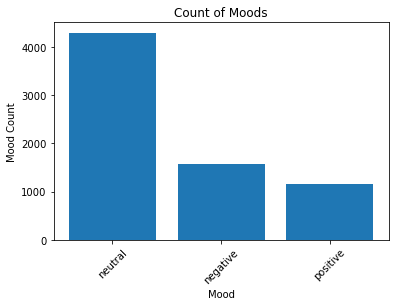

In [27]:
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['neutral','negative','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [29]:
from wordcloud import WordCloud,STOPWORDS

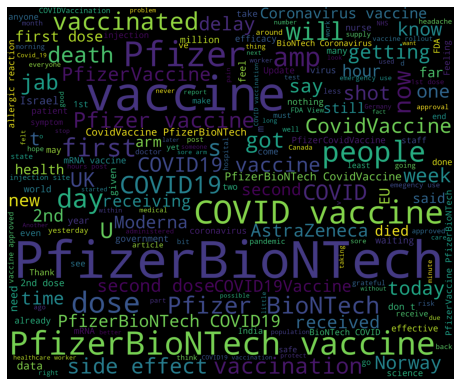

In [30]:
df=Sent[Sent['sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

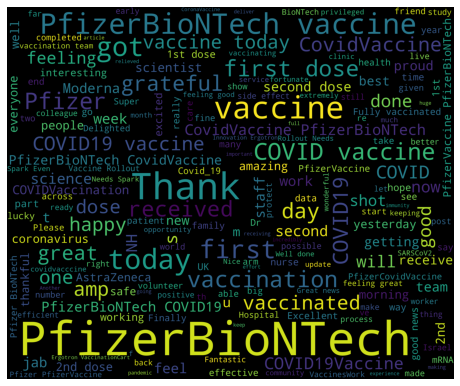

In [31]:
df=Sent[Sent['sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Modelo propio 

In [3]:
Tweets = pd.read_csv("tweetsent.csv")

### Preprocesamiento

In [5]:
Tweets

,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,negative
0,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",negative
1,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,neutral
2,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",negative
3,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,negative
4,Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN,negative
...,...,...
7009,Around 2 per cent of people who received the first dose of #PfizerBioNTech and #Moderna's mRNA-based… https://t.co/iR2ZoS9E3h,neutral
7010,"Pfizer-BioNtech vaccine ""efficiently"" neutralized a version of the virus engineered to carry the same mutations as… https://t.co/lgTJ5QIglp",negative
7011,"Pfizer-BioNtech vaccine ""efficiently"" neutralized a version of the virus engineered to carry the same mutations as… https://t.co/LtRsojlFXN",negative
7012,"After watching this,\n\nI prefer #PfizerBiontech &amp; #modernavaccine \n\nto #AstraZeneca &amp; #JohnsonAndJohnsonVaccine \n\nBu… https://t.co/wa3vOu56RC",neutral


In [6]:
tweet_df = Tweets[Tweets['negative'] != 'neutral']
tweet_df.head(10)

,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,negative
0,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",negative
2,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",negative
3,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,negative
4,Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN,negative
5,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",negative
6,There have not been many bright days in 2020 but here are some of the best \n1. #BidenHarris winning #Election2020… https://t.co/77u4f8XXfx,positive
9,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP",negative
10,@cnnbrk #COVID19 #CovidVaccine #vaccine #Corona #PfizerBioNTech #bbcnews #NYTimes #BBCNews Best wishes to the US… https://t.co/9xWmfU3LZj,positive
11,The agency also released new information for health care providers and for patients as the US shipped millions of d… https://t.co/sG6BtD7jD9,negative
14,Trump announces #vaccine rollout 'in less than 24 hours'\n\nThe first Americans will be vaccinated against… https://t.co/2FzQSMnhoY,negative


In [7]:
print(tweet_df['negative'].value_counts())

negative    1561
positive    1159
Name: negative, dtype: int64


In [8]:
# convert airline_seentiment to numeric
sentiment_label = tweet_df.negative.factorize() # convierte a factores numéricos
sentiment_label

(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 Index(['negative', 'positive'], dtype='object'))

### Modelo

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [14]:
print(tweet[0])
print(encoded_docs[0])

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm
[314, 4, 155, 40, 65, 28, 4, 794, 93, 8, 405, 21, 136, 555, 4, 1107, 42, 556, 1376, 1824, 3, 1, 2, 2814]


In [15]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  314    4  155   40   65   28
    4  794   93    8  405   21  136  555    4 1107   42  556 1376 1824
    3 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           316928    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 333,579
Trainable params: 333,579
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
68/68 [==============================] - 5s 71ms/step - loss: 0.0434 - accuracy: 0.9835 - val_loss: 0.9697 - val_accuracy: 0.7574
Epoch 2/5
68/68 [==============================] - 5s 71ms/step - loss: 0.0303 - accuracy: 0.9890 - val_loss: 0.9970 - val_accuracy: 0.7500
Epoch 3/5
68/68 [==============================] - 5s 75ms/step - loss: 0.0355 - accuracy: 0.9899 - val_loss: 1.0611 - val_accuracy: 0.7647
Epoch 4/5
68/68 [==============================] - 5s 77ms/step - loss: 0.0283 - accuracy: 0.9890 - val_loss: 1.1371 - val_accuracy: 0.7629
Epoch 5/5
68/68 [==============================] - 5s 79ms/step - loss: 0.0330 - accuracy: 0.9885 - val_loss: 1.2592 - val_accuracy: 0.7739


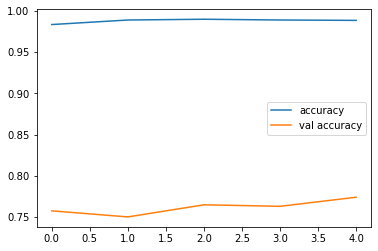

In [24]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

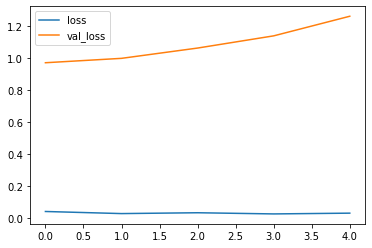

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [35]:
test_word = []
test_word.append("The vaccine is secure, I am not afraid. This can save my life.")
tw = tokenizer.texts_to_sequences(test_word)
tw = pad_sequences(tw,maxlen=200)
tw

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [36]:
prediction = model.predict(tw)
prediction

array([[0.04472011]], dtype=float32)